<FreqDist with 451 samples and 524 outcomes>
                                      Word  Count
Date                                             
2018-03-21 10:35:03     (Bitcoin, Satoshi)      4
2018-03-21 10:35:02  (blockchain, Airdrop)      3
2018-03-21 10:35:00         (Airdrop, New)      3
2018-03-21 10:34:56         (New, Airdrop)      3
2018-03-21 10:34:54        (Card, blocked)      2


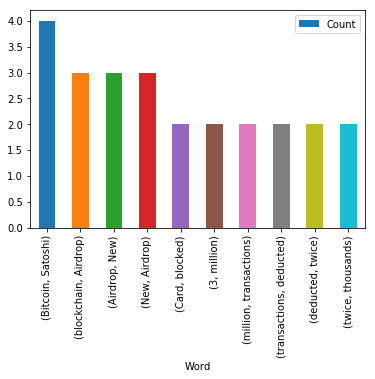

In [2]:
import re
import tweepy
import datetime
import time
import pandas as pd
import numpy as np
import csv
from tweepy import OAuthHandler
from textblob import TextBlob
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

from nltk.util import bigrams


cache_english_stopwords=stopwords.words('english')
#cache_en_tweet_stopwords=stopwords.words('english_tweet')

 
           
def write_sent_to_file(fname, df):
        try:
            df.to_csv(fname) 
            #sent.close()
        except IOError:
            print('An error occured trying to read the file.')
        except ValueError:
            print('Non-numeric data found in the file.')
        except ImportError:
            print('NO module found')
        except EOFError:
            print('Why did you do an EOF on me?')
        except KeyboardInterrupt:
            print('You cancelled the operation.')
            
            
def tweet_clean(df):
    temp_df = df.copy()
    # Remove hyperlinks
    temp_df.loc[:, "text"] = temp_df.loc[:, "text"].replace('https?:\/\/.*\/\w*', '', regex=True)
    # Remove hashtags
    # temp_df.loc[:,"text"]=temp_df.loc[:,"text"].replace('#\w*', '', regex=True)
    temp_df.loc[:, "text"] = temp_df.loc[:, "text"].replace('#', ' ', regex=True)
    # Remove citations
    temp_df.loc[:, "text"] = temp_df.loc[:, "text"].replace('\@\w*', '', regex=True)
    # Remove tickers
    temp_df.loc[:, "text"] = temp_df.loc[:, "text"].replace('\$\w*', '', regex=True)
    # Remove punctuation
    temp_df.loc[:, "text"] = temp_df.loc[:, "text"].replace('[' + string.punctuation + ']+', '', regex=True)
    # Remove stopwords
    for tweet in temp_df.loc[:,"text"]:
        tweet_tokenized=nltk.word_tokenize(tweet)
        for w in tweet_tokenized:
            if (w.lower() in cache_english_stopwords) :
                temp_df.loc[:, "text"] = temp_df.loc[:, "text"].replace('[\W*\s?\n?]'+w+'[\W*\s?]', ' ', regex=True)
                #print("w in stopword")
    # Remove quotes
    temp_df.loc[:, "text"] = temp_df.loc[:, "text"].replace('\&*[amp]*\;|gt+', '', regex=True)
    # Remove RT
    temp_df.loc[:, "text"] = temp_df.loc[:, "text"].replace('RT ', '', regex=True)
    # Remove linebreak, tab, return
    temp_df.loc[:, "text"] = temp_df.loc[:, "text"].replace('[\n\t\r]+', ' ', regex=True)
    # Remove via with blank
    temp_df.loc[:, "text"] = temp_df.loc[:, "text"].replace('via+\s', '', regex=True)
    # Remove multiple whitespace
    temp_df.loc[:, "text"] = temp_df.loc[:, "text"].replace('\s+\s+', ' ', regex=True)
    # Remove single word sentence
    for tweet_sw in temp_df.loc[:, "text"]:
        tweet_sw_tokenized = nltk.word_tokenize(tweet_sw)
        if len(tweet_sw_tokenized) <= 1:
            temp_df.loc["text"] = np.nan
    # Remove empty rows
    temp_df.loc[(temp_df["text"] == '') | (temp_df['text'] == ' ')] = np.nan
    temp_df = temp_df.dropna()
    return temp_df
            
def read_tweets_file():
        now = datetime.datetime.now()
        ## count the data in the Sentiment column of the CSV file 
        #word_tokenize accepts a string as an input, not a file.
        stop_words = set(stopwords.words('english'))
        with open("BTC_SNT_TXT.CSV", 'r', encoding='latin-1') as data:
            df_read = pd.read_csv(data)
            df = tweet_clean(df_read)
            bigrm = []
            for index, row  in df.iterrows():
                words = (word_tokenize(row['text']))
                bigrm += (list(nltk.bigrams(words)))
            fdist=nltk.FreqDist(bigrm)
            print(fdist)
            df_freq = pd.DataFrame(fdist.most_common(10))
            #df_freq.plot(cumulative=True)
            df_freq['created_at'] = pd.to_datetime(df_read['created_at'])
            df_freq.columns = ['Word', 'Count', 'Date']
            df_freq.index = df_freq['Date']
            del df_freq['Date']
            print(df_freq.head())
            df_freq.plot.bar(x='Word',y='Count')
            write_sent_to_file("BTC_BIGRM.CSV", df_freq)
                
            
        
def main():
        read_tweets_file()
 
if __name__ == "__main__":
    # calling main function
    main()